In [1]:
import sys
sys.path.append('..')
sys.path.append('../Modules')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Modules.analysis as analysis
print(os.getcwd())
if 'notebook' in os.getcwd():
    # os.chdir("../scripts") # go from Neural-Modeling/notebooks to Neural-Modeling/scripts, where simulation outputs will be generated to. (maybe a separate folder could be used...)
    os.chdir("../simulations") # go to output folder
    print(os.getcwd())

/home/drfrbc/Neural-Modeling/notebooks
/home/drfrbc/Neural-Modeling/simulations


In [2]:
# specify the simulation directory
# sim_dir = '/home/drfrbc/Neural-Modeling/simulations/2025-05-22-18-08-baseline_no_clusters/complex'
sim_dir ='/home/drfrbc/Neural-Modeling/simulations/2025-05-28-16-28-baseline_clusters/complex'
# sim_dir = "/home/drfrbc/Neural-Modeling/simulations/2025-05-23-11-54-baseline_no_clusters/reduced_branches"

In [3]:
# load the parameters from the simulation directory
parameters = analysis.DataReader.load_parameters(sim_dir)

--No graphics will be displayed.


Plotting voltage for /home/drfrbc/Neural-Modeling/simulations/2025-05-28-16-28-baseline_clusters/complex:


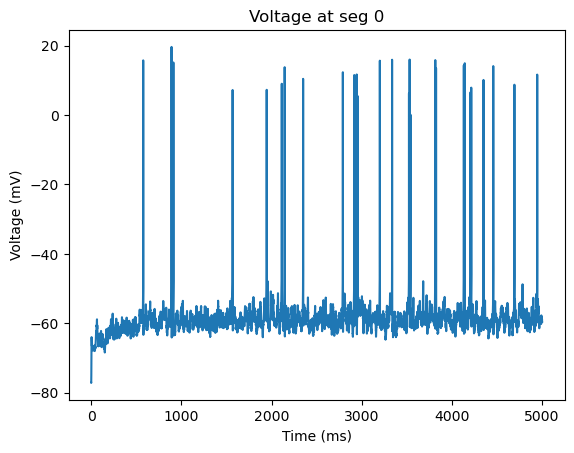

In [4]:
import Modules.analysis as analysis
import matplotlib.pyplot as plt
import numpy as np
def plot_voltage(sim_dir, seg_id):
    print(f"Plotting voltage for {sim_dir}:")
    v = analysis.DataReader.read_data(sim_dir, 'v')
    parameters = analysis.DataReader.load_parameters(sim_dir)
    t = np.arange(0,parameters.h_tstop +parameters.h_dt, parameters.h_dt)
    plt.plot(t, v[seg_id,:])
    plt.xlabel('Time (ms)')
    plt.ylabel('Voltage (mV)')
    plt.title(f'Voltage at seg {seg_id}')
    plt.show()

plot_voltage(sim_dir, seg_id=0)

In [5]:
soma_spikes = analysis.DataReader.read_data(sim_dir, 'soma_spikes')

In [ ]:
print(f"soma firing rate: {len(soma_spikes[0]) / parameters.h_tstop * 1000} Hz") # spikes per second

5.6

Axial Currents

In [7]:
!python ../scripts/plot_ac.py -d {sim_dir}

  File "/home/drfrbc/Neural-Modeling/simulations/../scripts/plot_ac.py", line 457
    nexus_segs = [sm.segments[nexus_seg_index]]
TabError: inconsistent use of tabs and spaces in indentation


Dendritic Spikes

In [8]:
# find dendritic spikes
if parameters.record_all_channels and parameters.record_all_synapses:
    print("Checking dendritic spikes")
    !python "../scripts/find_events_ben.py" -d {sim_dir}
else:
    print("Not checking dendritic spikes")


Checking dendritic spikes
--No graphics will be displayed.
Error loading HVA/LVA data: [Errno 2] Unable to synchronously open file (unable to open file: name = '/home/drfrbc/Neural-Modeling/simulations/2025-05-28-16-28-baseline_clusters/complex/saved_at_step_10000/ica_Ca_HVA.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
(50001, 2630) (50001, 2630) (50001, 2630)
segs:      section  idx_in_section_type  ...  segmentID  Elec_distanceQ
0       soma                    0  ...          0            None
1       dend                    0  ...          1               9
2       dend                    0  ...          2               9
3       dend                    0  ...          3               9
4       dend                    0  ...          4               9
...      ...                  ...  ...        ...             ...
2625    axon                    0  ...       2625            None
2626    axon                    0  ...       2626            No

In [9]:
# plot voltages where d spikes were detected
if parameters.record_all_channels and parameters.record_all_synapses:
    !python ../scripts/plot_vm_for_dend_spikes.py -d {sim_dir}
else:
    print("Not checking dendritic spikes")


--No graphics will be displayed.
(2025-05-28 16:55:57.610139)-[PID: 3377190]–[INFO]: Soma firing rate: 5.6 Hz
(2025-05-28 16:55:57.610164)-[PID: 3377190]–[INFO]: Analyzing Na.
Traceback (most recent call last):
  File "/home/drfrbc/Neural-Modeling/simulations/../scripts/plot_vm_for_dend_spikes.py", line 223, in <module>
    _analyze_Na()
  File "/home/drfrbc/Neural-Modeling/simulations/../scripts/plot_vm_for_dend_spikes.py", line 155, in _analyze_Na
    spike_start_times, _ = analysis.VoltageTrace.get_Na_spikes(gnaTa[i], 0.001 / 1000, soma_spikes, 2, v[i], v[0])
ValueError: too many values to unpack (expected 2)

(2025-05-28 16:56:00.809066)-[PID: 3377190]–[INFO]: Analyzing Ca.
Index(['section', 'idx_in_section_type', 'seg_half_seg_RA', 'L', 'length',
       'seg', 'pseg', 'Section_L', 'Section_diam', 'Distance', 'p0_0', 'p0_1',
       'p0_2', 'pc_0', 'pc_1', 'pc_2', 'p1_0', 'p1_1', 'p1_2', 'r', 'dl_0',
       'dl_1', 'dl_2', 'seg_id', 'sec_type_precise'],
      dtype='object')
Caapic 

In [10]:
# plot d spike properties
if parameters.record_all_channels and parameters.record_all_synapses:
    !python ../Modules/event_histograms.py -d {sim_dir}
else:
    print("Not checking dendritic spikes")


--No graphics will be displayed.
/home/drfrbc/Neural-Modeling/simulations/../Modules/event_histograms.py:353: RuntimeWarning: invalid value encountered in divide
  plt.imshow(100 * ca_df_imhist / ca_df_imhist.sum(), origin = 'lower')
Figure(600x600)
Figure(600x600)
Figure(200x500)
Figure(600x600)
Figure(600x600)
Figure(200x500)
Figure(600x600)


In [11]:
# STA
!python ../scripts/plot_sta.py -d {sim_dir}

--No graphics will be displayed.
(2025-05-28 16:56:30.596860)-[PID: 3377508]–[INFO]: Soma firing rate: 5.6 Hz
(2025-05-28 16:56:30.596896)-[PID: 3377508]–[INFO]: Analyzing all spike relationships.
sim_directory: /home/drfrbc/Neural-Modeling/simulations/2025-05-28-16-28-baseline_clusters/complex
Figure(800x600)
SUCCESS analyzing Na spikes w.r.t. Na spikes in apic section, soma distance:
sim_directory: /home/drfrbc/Neural-Modeling/simulations/2025-05-28-16-28-baseline_clusters/complex
Figure(800x600)
SUCCESS analyzing Na spikes w.r.t. Na spikes in dend section, soma distance:
sim_directory: /home/drfrbc/Neural-Modeling/simulations/2025-05-28-16-28-baseline_clusters/complex
Figure(800x600)
SUCCESS analyzing Na spikes w.r.t. Ca spikes in apic section, soma distance:
sim_directory: /home/drfrbc/Neural-Modeling/simulations/2025-05-28-16-28-baseline_clusters/complex
Figure(800x600)
SUCCESS analyzing Na spikes w.r.t. NMDA spikes in apic section, soma distance:
sim_directory: /home/drfrbc/Neura